# A look at Airbnb in NYC

***

## Background
A frequently used keyword in the startup culture is “disrupt,” and while these entrepreneurial ventures benefit many by empowering their audience through additional sources of income, they also cause disturbances in the surrounding economic ecosystems. A popular example is Airbnb. Airbnb has been rising in popularity for travel accommodations as an alternative to hotels, however what's worrisome is that Airbnb may be negatively impacting communities such as New York City by displacing residents. It is argued that Airbnb incentivizes landlords to use their spaces as Airbnb rentals instead of renting them out to tenants, that Airbnbs raise the prices of housing in NYC thereby displacing lower income residents, and that it may even contribute to the gentrification of NYC neighborhoods.

## Value
Understanding the impact of Airbnbs on NYC can help influence [government policies](https://www.airbnb.com/help/article/868/new-york--ny) or even company policies such that Airbnb and NYC residents can have a mutually beneficial relationship. This allows Airbnb to stay in good standing with the city and allows the city's government to mitigate adverse effects of increasing Airbnb popularity.

## Data Collection

To understand how the increasing availability of Airbnbs related to the housing market in New York City, we needed Airbnb data for NYC, housing prices, population data (to normalize data for given regions), and boundary files for the given regions. Airbnb data was downloaded in CSV format from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) while housing metrics such as price-to-rent ratios and median housing price were extracted as JSON files from [Quandl’s Zillow API](https://www.quandl.com/data/ZILLOW-Zillow-Real-Estate-Research).

In [1]:
%matplotlib inline

#Import libraries
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
#Read in CSV data files; Due to the size of the rental data, I broke out the data according to years
airbnb = pd.read_csv('zip_clean.csv',index_col=0)
airbnb15 = pd.read_csv('airbnb15.csv',index_col=0)
airbnb16 = pd.read_csv('airbnb16.csv',index_col=0)
airbnb17 = pd.read_csv('airbnb17.csv',index_col=0)
airbnb17_count = pd.read_csv('airbnb17_count.csv',index_col=0)
airbnb17_countavg = pd.read_csv('airbnb17_countavg.csv',index_col=0)
topzip17 = pd.read_csv('topzip17.csv',index_col=0)
norm17 = pd.read_csv('norm17.csv',index_col=0)
air_zillow = pd.read_csv('airzillow_df.csv', index_col=0)
linreg_df = pd.read_csv('linear_reg_df.csv', index_col=0)

## Where are the most Airbnbs located in NYC?

In the below bar graphs, it becomes apparent that particular zipcodes had the most Airbnbs during the 2017 year. The top 3 zipcodes are 11211, 11221, and 11206. Respectively, these neighborhoods are Williamsburg/Greenpoint, Bed-Stuy/Bushwick, and Bushwick/Williamsburg. If you look at these areas on the map, you'll notice that these locations are all in Brooklyn and within close proximity of each other.

<Figure size 432x288 with 0 Axes>

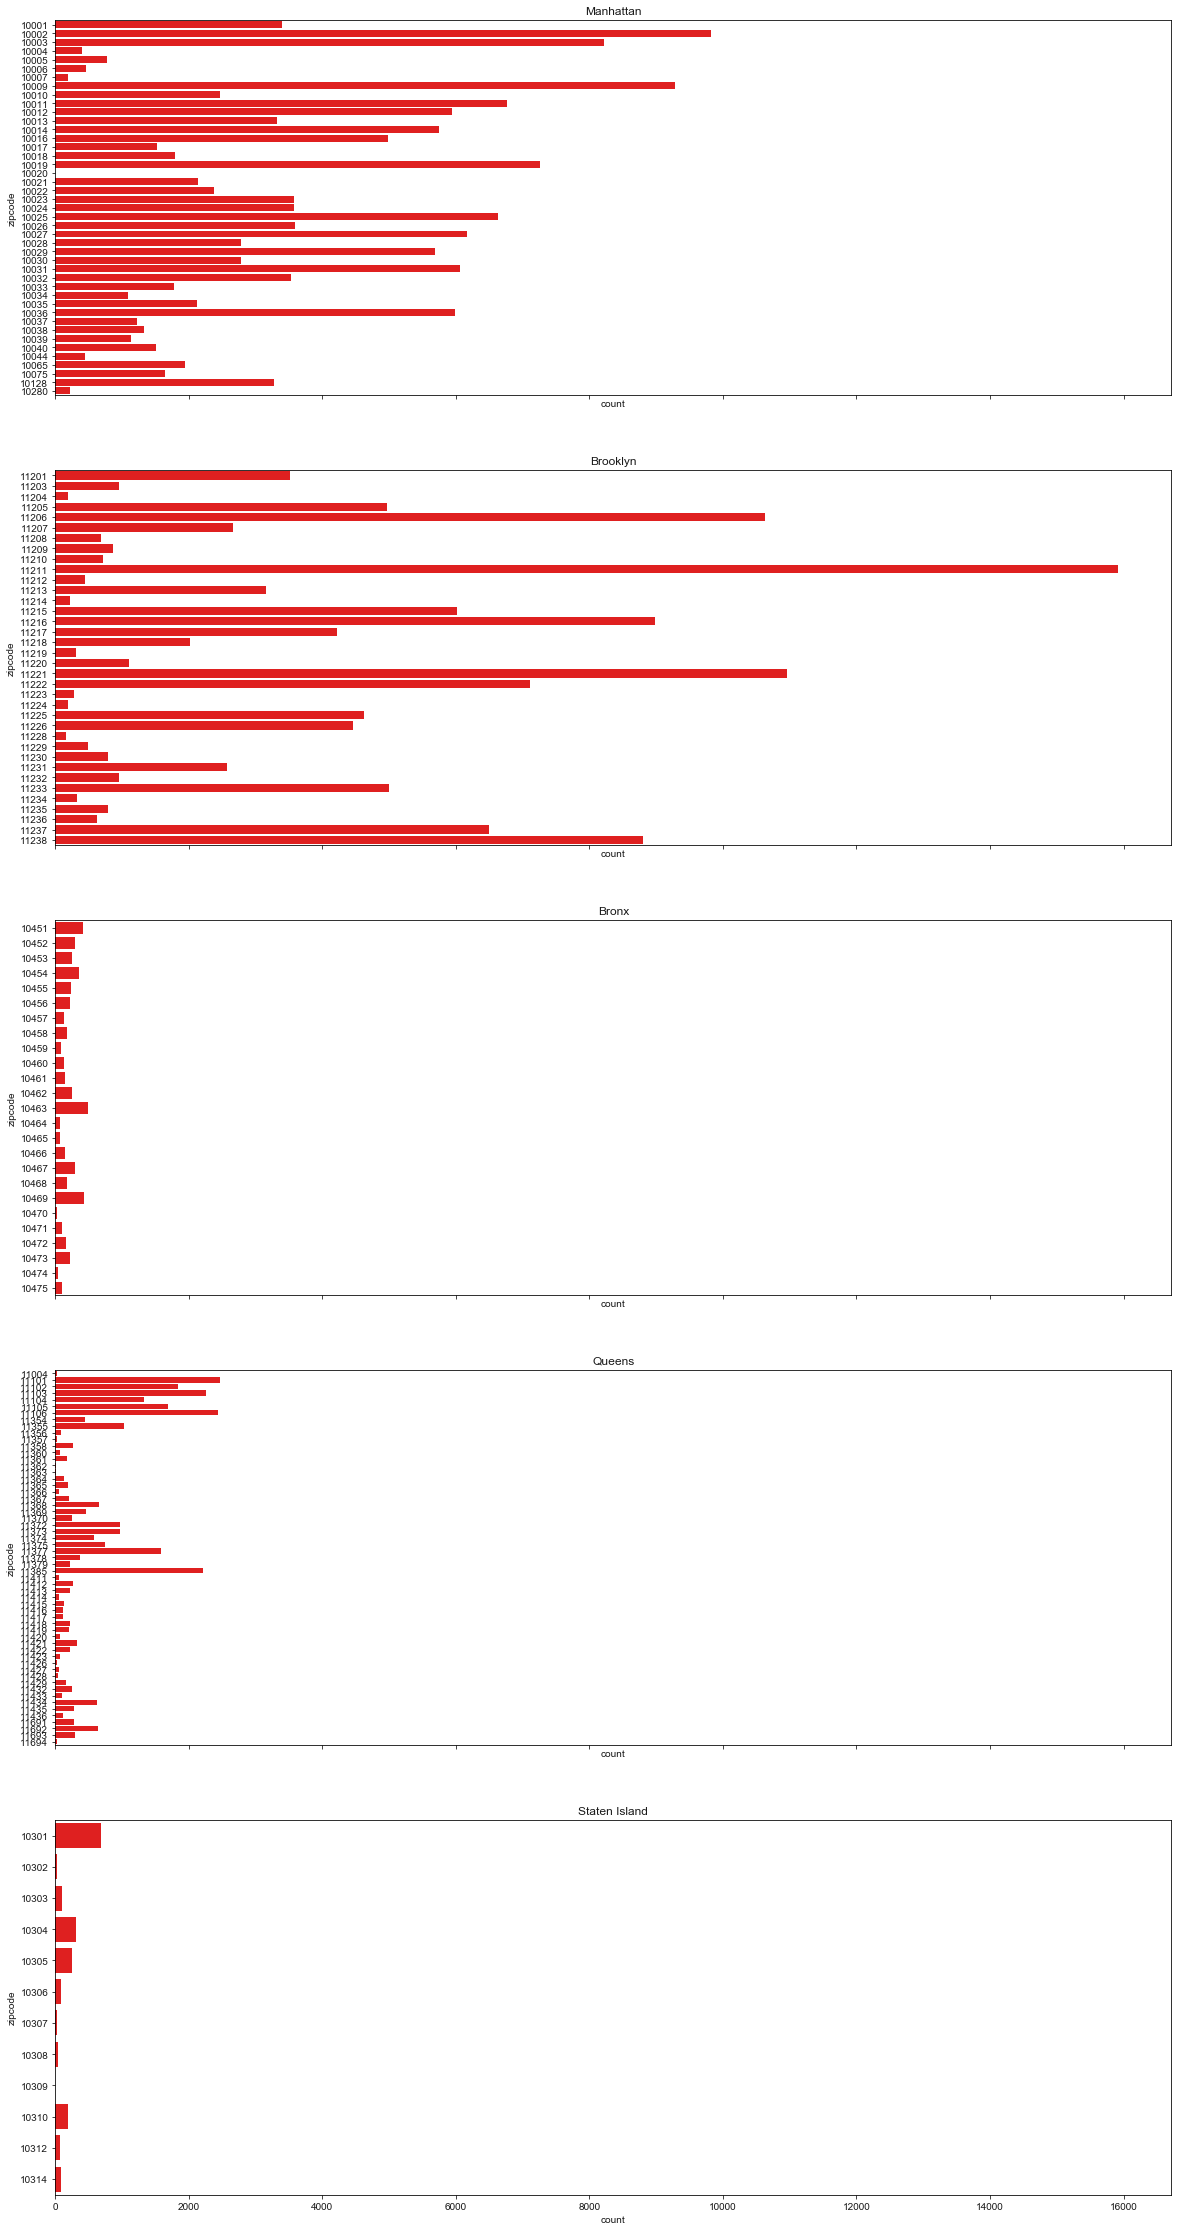

In [3]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan = airbnb17[airbnb17['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.countplot(y="zipcode", data=manhattan, ax=ax1, color='red')

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn = airbnb17[airbnb17['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.countplot(y="zipcode", data=brooklyn, ax=ax2, color='red')

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx = airbnb17[airbnb17['zipcode'].isin(bronx_zips)]
sns.countplot(y="zipcode", data=bronx, ax=ax3, color='red')
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens = airbnb17[airbnb17['zipcode'].isin(queens_zips)]
sns.countplot(y="zipcode", data=queens, ax=ax4, color='red')
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten = airbnb17[airbnb17['zipcode'].isin(staten_zips)]
sns.countplot(y="zipcode", data=staten, ax=ax5, color='red')
ax5.set_title("Staten Island")

plt.show()

In [4]:
abnb_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnb_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

In [5]:
airbnb17_countv2 = airbnb17_count[['zipcode','airbnb_count','pop10','lat','long','norm_count']].groupby(['zipcode'], as_index=False).agg('mean')
abnbmap = airbnb17_countv2[['zipcode','airbnb_count','lat','long']]

In [6]:
for index, row in abnbmap.iterrows():
    radius = row["airbnb_count"]/50.0 #arbitrary constant used
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnb_map)

### Where are the most Airbnbs located in NYC (spatially)?

By mapping out the number of Airbnbs per zipcode, it is more easily apparent to see that there's a focus of Airbnbs in the lower Manhattan and adjacent Brooklyn area. It is however interesting that the next prominent area appears to be the upper west side of Manhattan is the next focal point of Airbnb locations.

The Second Airbnb Focus: Morningside Heights/Hamilton Heights/Harlem
What's peculiar about the second location is that it is far from typical tourist attractions and "viral video" locations. This begs to ask:
* **Are there more Airbnbs here because people living in these areas are in need of more income and open their homes?**
    *What are the demographics of the people who live in these neighborhoods?
    *Are they typically families, a couple, or a single person?
    *What does their income look like in relation to the rent prices in the neighborhood?
* **Are there more Airbnbs here because tourists want to be in this location?**
    *Is there value here for tourists or is it a price point issue?
    *Is it due to the cultural history there (Harlem, Apollo Theater, The Cotton Club)?
    *Are tourists there to tour the college campuses in the area?
    *Are tourists there because it's convenient (A/B/C/D and the '4/5/6 train' lines connect this secondary Airbnb focal point to the primary Airbnb location focal point in Midtown to Lower Manhattan)?

In [7]:
abnb_map

## Are these zipcode locations "popular" due to population density in those areas? Which locations are more popular in respect to the population?

It's possible that the varying populations of each zipcode could inflate the data. It was thus normalized by population by using [2010 census data](https://www.census.gov/geo/maps-data/data/gazetteer2010.html) and was then averaged for the 2017 year. Notably, the Airbnbs with regard to population tend toward Manhattan with the top 3 zipcodes being 10018, 10036, and 10012. The first two zipcodes encompass the neighborhoods of Midtown West and Clinton (near 42nd street) while the third zipcode straddles NoHo and SoHo.



*Note that zipcode 10020 was dropped in the data since it was recorded as having "0" population. It only accounted for 2 datapoints out of 1719.

<Figure size 432x288 with 0 Axes>

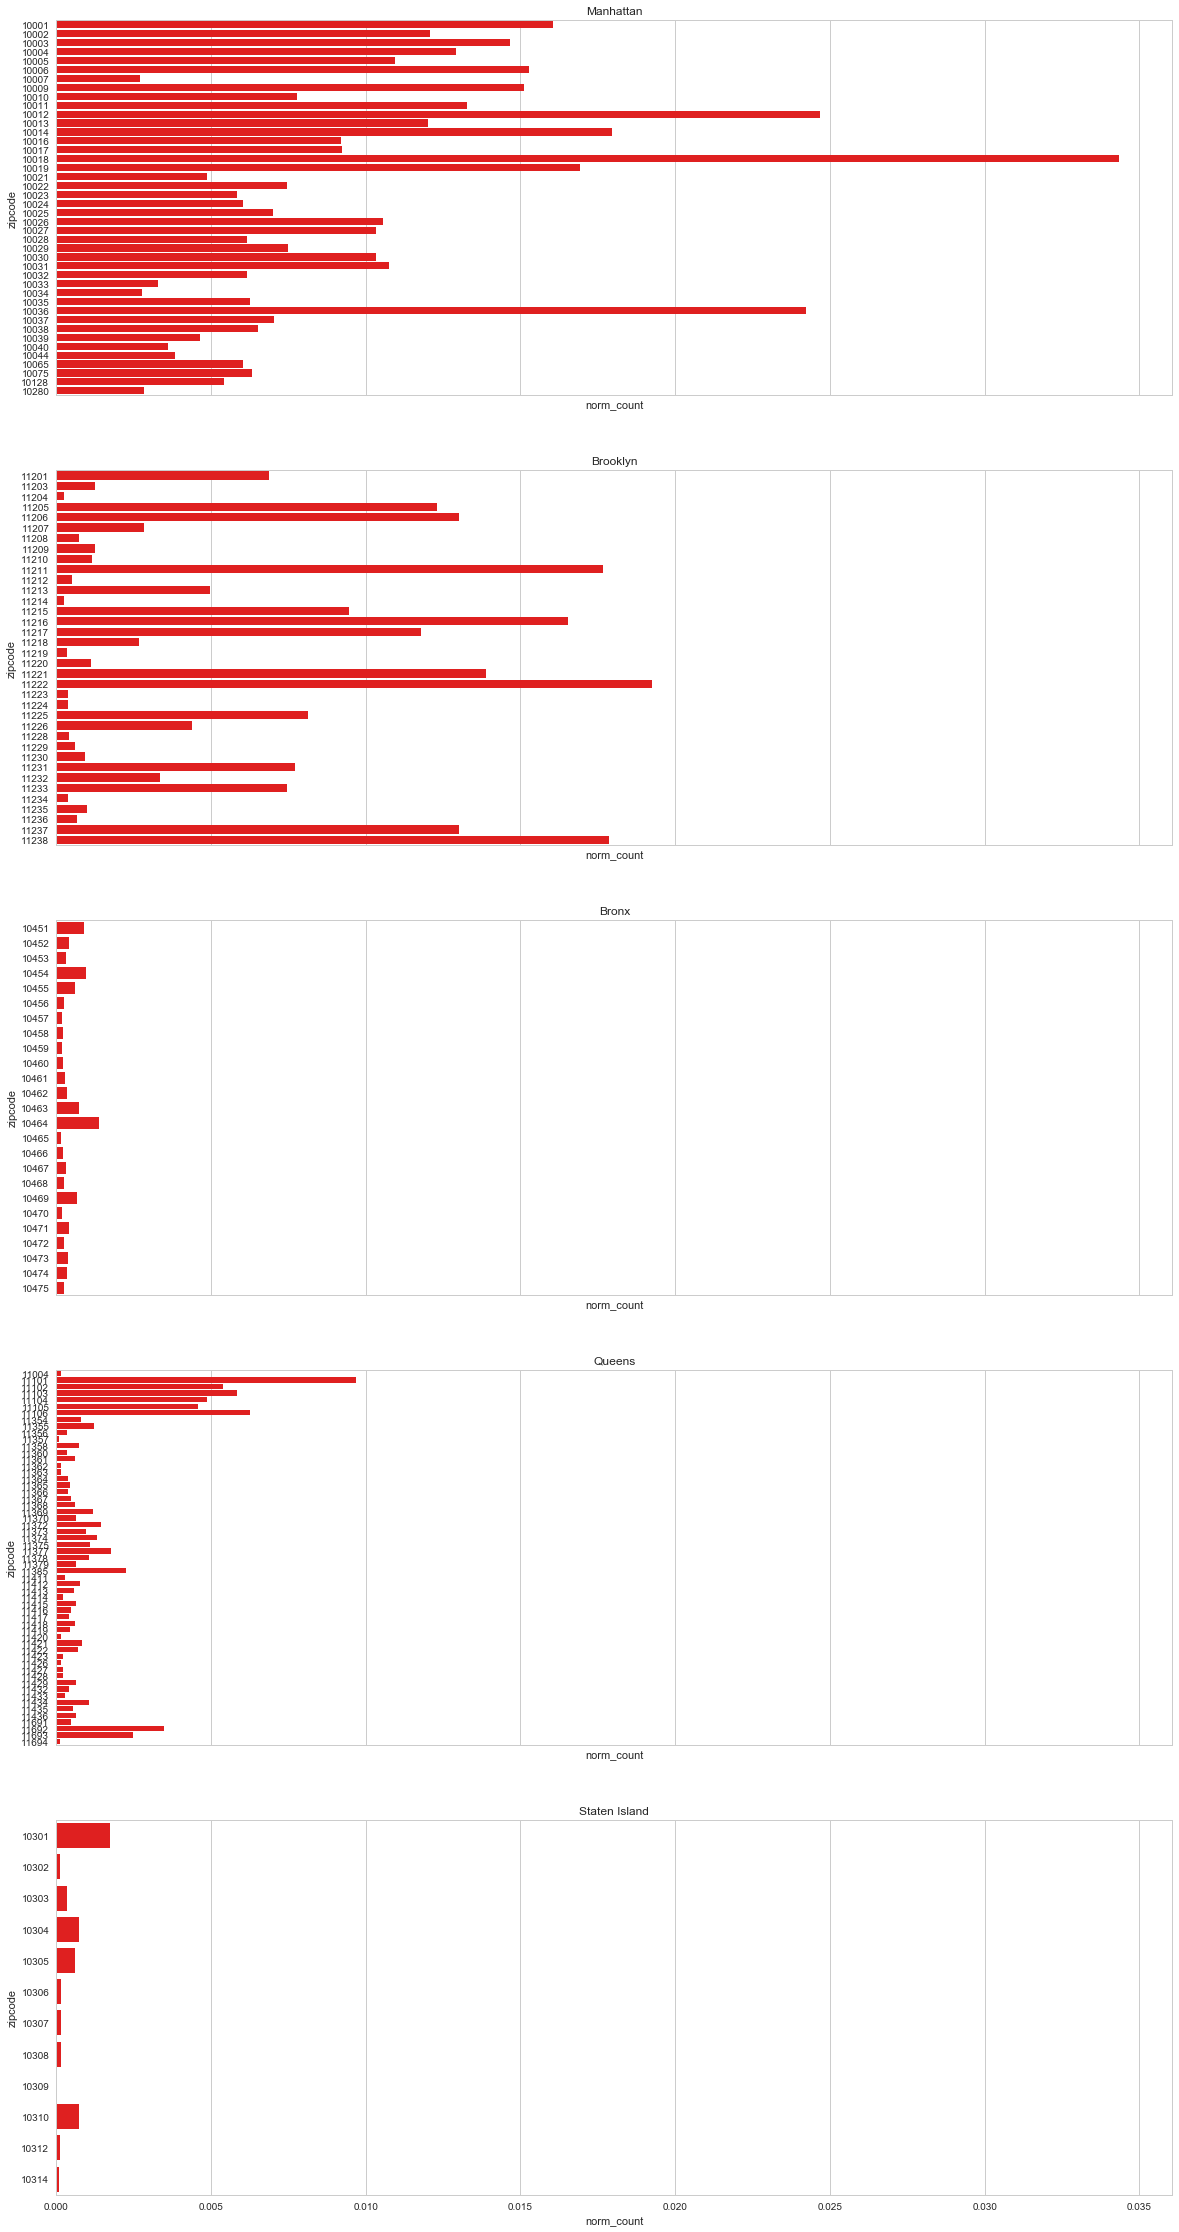

In [8]:
#NYC Airbnb's roomtypes from 2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.barplot(x="norm_count", y="zipcode", data=manhattan_count, ax=ax1, orient="h", ci=None, color='red')

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.barplot(x="norm_count", y="zipcode", data=brooklyn_count, ax=ax2, orient="h", ci=None, color='red')

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(bronx_zips)]
sns.barplot(x="norm_count", y="zipcode", data=bronx_count, ax=ax3, orient="h", ci=None, color='red')
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(queens_zips)]
sns.barplot(x="norm_count", y="zipcode", data=queens_count, ax=ax4, orient="h", ci=None, color='red')
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten_count = airbnb17_countavg[airbnb17_countavg['zipcode'].isin(staten_zips)]
sns.barplot(x="norm_count", y="zipcode", data=staten_count, ax=ax5, orient="h", ci=None, color='red')
ax5.set_title("Staten Island")

plt.show()

In [9]:
#Add coordinate data to dataframe normalized for population density
latlong = airbnb17_countv2[['zipcode','lat','long']]
airbnb17_countv3 = pd.merge(airbnb17_countavg,latlong,how='left',on='zipcode')

In [10]:
abnbnorm_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnbnorm_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in airbnb17_countv3.iterrows():
    radius = row["norm_count"]*1000.0 #arbitrary constant used
    folium.CircleMarker(location=(row[4],
                                  row[5]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnbnorm_map)

## Where are most Airbnbs in NYC after accounting for population density (spatially)?

Spatially, we can see a shift in popular areas for Airbnbs from the west side of Brooklyn and the east side of Manhattan in the prior map to primarily the southern tip and west side of Manhattan in this normalized map. However, the locations in the last map are still prominent locations regardless of their populations.

In [11]:
abnbnorm_map

In [12]:
abnboverlap_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

abnboverlap_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in abnbmap.iterrows():
    radius = row["airbnb_count"]/50.0 #arbitrary constant used
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='green',
                        fill=True).add_to(abnboverlap_map)
    
for index, row in airbnb17_countv3.iterrows():
    radius = row["norm_count"]*1000.0 #arbitrary constant used
    folium.CircleMarker(location=(row[4],
                                  row[5]),
                        radius=radius,
                        color='yellow',
                        fill=True).add_to(abnboverlap_map)

abnboverlap_map

# Out of the zipcodes with high Airbnb-to-population ratios, which are priced the highest?

Out of 173 zipcodes, I sorted for areas where there was at least 1 Airbnb per 100 people and got a list of 35 zipcodes. The top 5 are: 10017, 10013, 10014, 10018, and 10001.
* **10017 = Murray Hill|East Side|Midtown --> Oddly this is east side.**
Initially, I believed that this was odd as it was the East side of midtown. Upon closer inspection, I realized that this zipcode contains the United Nations HQ, Grand Central Terminal, a number of hotels, and is adjacent to Bryant Park and Rockefeller Center. 
* **10013 = Tribeca|Downtown|Manhattan**
This zipcode includes Chinatown and Little Italy. It is comprised of a few commercial and manufacturing districts and also has a number of hotels and museums. Within walking distance of this zipcode are NYU, an internationally recognized university, and SOHO, a famous neighborhood for high fashion shopping.
* **10014 = Meatpacking District|Downtown|Manhattan**
The zipcode 10014 is just north of 10013. It is also near NYU and is on the edge of High Line park and Chelsea Market, popular tourist attractions in NYC.
* **10018 = Clinton|Midtown West|West Side|Manhattan**
Zipcode 10018 is in southern Times Square and contains Bryant Park, Port Authority Bus Terminal, and a few hotels. It is a convenient location to explore Times Square and to travel in and out of NYC as Penn Station and Grand Central Terminal are also nearby.
* **10001 = Chelsea**
The Empire State Building, Penn Station, Madison Square Garden, the iconic Macy's, and half of High Line park are within zipcode 10001. This location is not far from Times Square and also has easy access to transportation into and out of New York City.


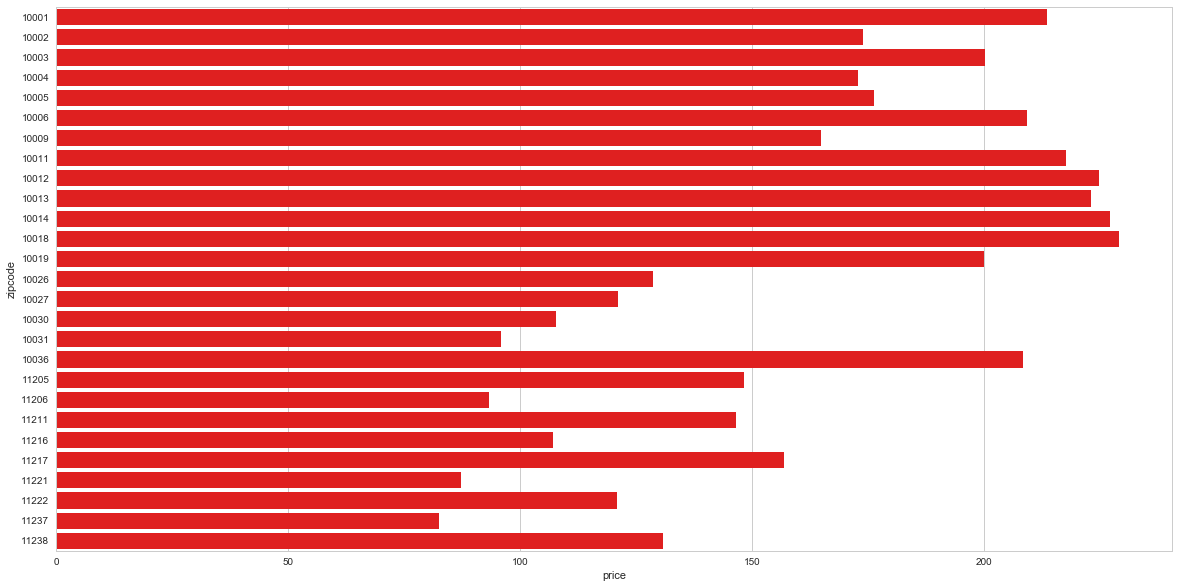

In [13]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x="price", y="zipcode", data=topzip17, orient="h", ci=None, color='red')

# topzip17

In [14]:
topzip17 = pd.merge(topzip17,latlong,how='left',on='zipcode')

In [15]:
topzip17_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

topzip17_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in topzip17.iterrows():
    radius = row["price"]/10.0
    folium.CircleMarker(location=(row[3],
                                  row[4]),
                        radius=radius,
                        color='orange',
                        fill=True).add_to(topzip17_map)

### Out of the zipcodes with high Airbnb-to-population ratios, which are priced the highest? (spatially)

Understandably, Airbnb prices in Midtown to lower Manhattan are more expensive than similar "popular" Airbnb locations further away. This may suggest that there is a relationship between price and distance from a point that is centrally located in downtown Manhattan. Though this is only a subset of the data.
* What happens when we look at average Airbnb prices all over NYC?
* Are Airbnb customers paying for what other Airbnb customers consider "quality locations"?

In [16]:
topzip17_map

In [17]:
topzip17list = topzip17['zipcode']
topzip17list
topzip17df = airbnb17[airbnb17['zipcode'].isin(topzip17list)]
topzip17scoreloc = topzip17df[['zipcode','review_scores_location']]

top17scoreloc = pd.merge(topzip17scoreloc,latlong,how='left',on='zipcode')

In [18]:
#Finding the average rating for Airbnbs in these highly priced zipcodes
top17scorelocagg = top17scoreloc.groupby(['zipcode'], as_index=False).agg('mean')
top17scorelocagg

zipcode  review_scores_location        lat       long
0     10001                9.722845  40.750672 -73.997281
1     10002                9.449807  40.715762 -73.986258
2     10003                9.872993  40.731829 -73.989181
3     10004                9.789474  40.688630 -74.018244
4     10005                9.788732  40.705974 -74.008768
5     10006                9.778261  40.709614 -74.012954
6     10009                9.601294  40.726408 -73.978636
7     10011                9.933255  40.742002 -74.000594
8     10012                9.925845  40.725581 -73.998078
9     10013                9.730063  40.720107 -74.004928
10    10014                9.946195  40.733698 -74.007033
11    10018                9.683185  40.755329 -73.993127
12    10019                9.832323  40.765793 -73.987067
13    10026                9.232227  40.802380 -73.952681
14    10027                9.250892  40.811819 -73.953224
15    10030                9.036253  40.818267 -73.942856
16    10031                9.092259  40.825294 -73.950056
17    10036                9.804780  40.759280 -73.989909
18    11205                9.311116  40.694698 -73.966301
19    11206                9.112659  40.701954 -73.942358
20    11211                9.712312  40.712597 -73.953098
21    11216                9.042079  40.680768 -73.949316
22    11217                9.799811  40.682306 -73.978099
23    11221                8.821243  40.691340 -73.927879
24    11222                9.617192  40.727790 -73.947605
25    11237                9.228686  40.704160 -73.921139
26    11238                9.569253  40.679171 -73.963804

In [19]:
topziplocscore_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

topziplocscore_map.choropleth(geo_data="nyczip.geojson",
                     fill_opacity=0.5, line_opacity=0.5
                     ) 

for index, row in top17scorelocagg.iterrows():
    radius = row["review_scores_location"]*3
    folium.CircleMarker(location=(row[2],
                                  row[3]),
                        radius=radius,
                        color='orange',
                        fill=True).add_to(topziplocscore_map)

### Are particular locations comparitively better than others? 

According to the average scores of the prime locations, they're similar to each other despite being vastly different neighborhoods.

In [20]:
topziplocscore_map

## Do Airbnb-to-population ratios correspond with average prices Airbnbs charge?

 There is a present but weak correlation between the airbnb-population ratio and average Airbnb price.

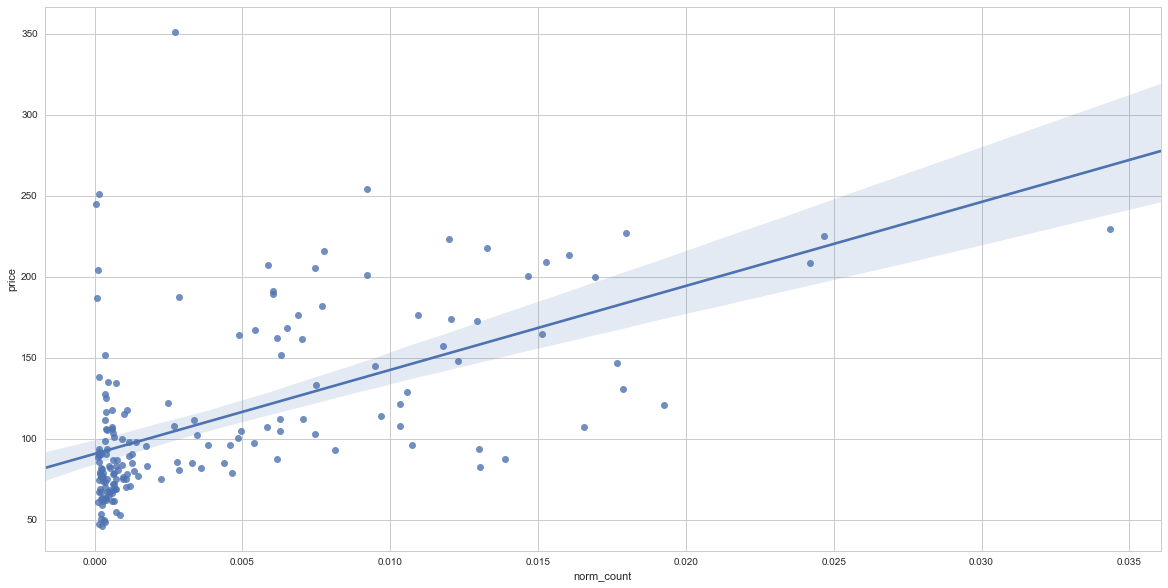

In [21]:
fig = plt.figure(figsize=(20,10))

sns.set(style="whitegrid", color_codes=True)

ax = sns.regplot(y="price", x="norm_count", data=norm17)

# topzip17

### Where is the datapoint with the price over 350 dollars? Why?

Zipcode 10007 is located in Lower Manhattan. According to [NYC's Planning Zoning and Land Use Map](https://zola.planning.nyc.gov/) the area is a Commercial district and therefore unlikely to have housing. It is possible that this particular listing is therefore a hotel listing in a prime location in Manhattan with close proximity to the famous World Trade Center, City Hall, a number of shopping areas, and several train stations.

In [22]:
norm17[norm17.price > 300]['zipcode']


66    10007
Name: zipcode, dtype: int64

In [23]:
#Finding the average rating for Airbnbs in this zipcode
highprice_df = airbnb17[airbnb17.zipcode == 10007]
highprice_df['review_scores_location'].mean()

9.31578947368421

### What factors affect housing price?

[Studies on Airbnb in NYC](https://mcgill.ca/newsroom/files/newsroom/channels/attach/airbnb-report.pdf) suggest that the vacation rental platform drives up the rent and housing prices in NYC. Using statsmodels to create a linear regression model from both Zillow and Airbnb data, we find that:
* the number of active Airbnbs,
* the price to rent ratio,
* the year,
* the availability within the 90 days to a year,
* the number of bathrooms,
* the number of bedrooms, and
* the number of reviews

are statistically significant in affecting the median housing price. However, when we compare the prediction values against the actual values, we see that the model doesn't perform well in predicting prices above 1.5 million. I suspect that the key to a better performing model would be to include square footage, acres, and location data as these characteristics are typically associated with housing costs.

In [24]:
linreg = pd.read_csv('linear_reg_df_exp.csv',index_col=0)
linreg.shape

(3504, 23)

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('median_list_price ~ active_count + pr_ratio + year + month + accommodates + availability_30 + availability_365 + availability_60 + availability_90 + bathrooms + bedrooms + beds + calculated_host_listings_count + guests_included + maximum_nights + minimum_nights + month + number_of_reviews + price + pop10', linreg).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:      median_list_price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     47.86
Date:                Sat, 22 Sep 2018   Prob (F-statistic):          2.23e-159
Time:                        09:41:10   Log-Likelihood:                -52027.
No. Observations:                3480   AIC:                         1.041e+05
Df Residuals:                    3460   BIC:                         1.042e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Text(0.5,1,'Relationship between Original and Predicted Housing Prices')

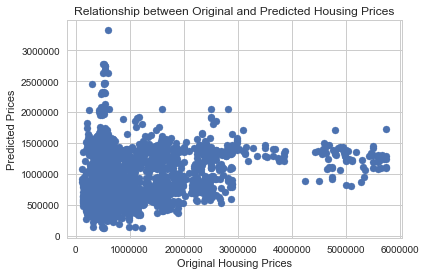

In [30]:
plt.scatter(linreg.median_list_price[0:3480], m.fittedvalues[0:3480])
plt.xlabel("Original Housing Prices")
plt.ylabel("Predicted Prices")
plt.title("Relationship between Original and Predicted Housing Prices")

In [27]:
m.fittedvalues.shape

(3480,)

In [28]:
linreg.median_list_price.shape

(3504,)